In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/competitive-data-science-predict-future-sales/items.csv
/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv
/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv
/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv
/kaggle/input/competitive-data-science-predict-future-sales/shops.csv
/kaggle/input/competitive-data-science-predict-future-sales/test.csv


In [31]:
df = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv')
df_test = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/test.csv',index_col = 'ID')
sub = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv')


In [3]:
df.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0


In [4]:
df_test.head()

,shop_id,item_id
ID,,
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268


In [4]:
df.isna().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [5]:
df_test.isna().sum()

shop_id    0
item_id    0
dtype: int64

In [6]:
df.columns


Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x7efe3e7b3810>,
 'caps': [<matplotlib.lines.Line2D at 0x7efe3e7420d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efe3e7b33d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7efe3e742990>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efe3e7b36d0>],
 'means': []}

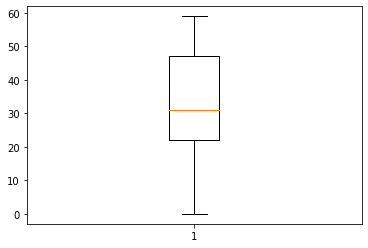

In [7]:
import matplotlib.pyplot as plt
plt.boxplot(df.shop_id)

{'whiskers': [<matplotlib.lines.Line2D at 0x7efe3e6afc90>,
 'caps': [<matplotlib.lines.Line2D at 0x7efe3e6b7550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efe3e6af8d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7efe3e6b7e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efe3e643290>],
 'means': []}

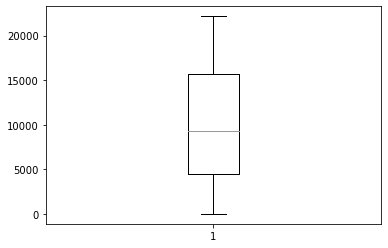

In [8]:
plt.boxplot(df.item_id)

{'whiskers': [<matplotlib.lines.Line2D at 0x7efe3e620ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x7efe3e62a790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efe3e620b10>],
 'medians': [<matplotlib.lines.Line2D at 0x7efe3e634090>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efe3e6344d0>],
 'means': []}

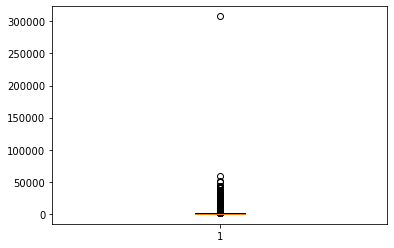

In [9]:
plt.boxplot(df.item_price)

{'whiskers': [<matplotlib.lines.Line2D at 0x7efe3e59af90>,
 'caps': [<matplotlib.lines.Line2D at 0x7efe3e5a4850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efe3e59abd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7efe3e5ae150>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efe3e5ae590>],
 'means': []}

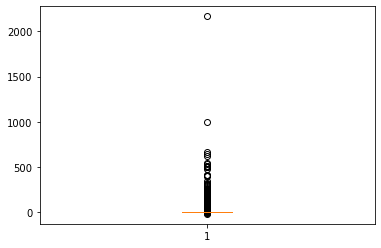

In [10]:
plt.boxplot(df.item_cnt_day)

In [31]:
#df['item_cnt_day'] = df[df['item_cnt_day']<1000]
#df['item_price'] = df[df['item_price']<80000]

In [13]:
df_train = df.loc[df['date_block_num'] == 33].reset_index(drop = True)
df_train.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,23.10.2015,33,45,13315,649.0,1.0
1,05.10.2015,33,45,13880,229.0,1.0


In [16]:
train = df_train.groupby(['shop_id','item_id']).item_cnt_day.sum().reset_index()
train.head(2)


,shop_id,item_id,item_cnt_day
0,2,31,1.0
1,2,486,3.0


In [29]:
train_data = pd.merge(df_test,train,how = 'left').fillna(0)
train_data

,shop_id,item_id,item_cnt_day
0,5,5037,0.0
1,5,5320,0.0
2,5,5233,1.0
3,5,5232,0.0
4,5,5268,0.0
...,...,...,...
214195,45,18454,1.0
214196,45,16188,0.0
214197,45,15757,0.0
214198,45,19648,0.0


In [30]:
train_data['item_cnt_day'] = train_data['item_cnt_day'].clip(lower = 0,upper = 20)
train_data.head()

,shop_id,item_id,item_cnt_day
0,5,5037,0.0
1,5,5320,0.0
2,5,5233,1.0
3,5,5232,0.0
4,5,5268,0.0


In [32]:
sub.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [34]:
sub['item_cnt_month'] = train_data['item_cnt_day']
sub.head()

,ID,item_cnt_month
0,0,0.0
1,1,0.0
2,2,1.0
3,3,0.0
4,4,0.0


In [ ]:
sub.to_csv('sub.csv',index = False)